### Modelling with Pip

In this notebook the following models are used and best parameters using hyper Parameter tuning with GridSearchCV

1. K-Nearest Neighbors

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import datetime
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [2]:
df_train = pd.read_csv('dataset/df_train.csv')
df_test = pd.read_csv('dataset/df_test.csv')

In [3]:
target = df_train['SalePrice']
df_train = df_train.drop(['SalePrice'], axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size = 0.25, random_state = 42)

#### 1. Ridge Regression

In [5]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas_ridge = [
    14.5,14.6,14.7,14.8,14.9,15, 
    15.1, 15.2, 15.3, 15.4, 15.5, 15.6
]

ridge = make_pipeline(RobustScaler(),
                     RidgeCV(
                         alphas = alphas_ridge,
                         cv = kfolds
                     ))

print('############################################################\nRidge: \n', 
      ridge, 
      '\n############################################################\n')



############################################################
Ridge: 
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('ridgecv',
                 RidgeCV(alphas=array([14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5,
       15.6]),
                         cv=KFold(n_splits=10, random_state=42, shuffle=True),
                         fit_intercept=True, gcv_mode=None, normalize=False,
                         scoring=None, store_cv_values=False))],
         verbose=False) 
############################################################



#### 2. Lasso Regression

In [6]:
alphas_lasso = [
    5e-05, 0.0001, 0.0002, 0.0003, 
    0.0004, 0.0005, 0.0006, 0.0007
]

lasso = make_pipeline(
        RobustScaler(),
        LassoCV(
            alphas = alphas_lasso,
            max_iter = 1e7,
            cv = kfolds
        )
)
print('############################################################\nLasso: \n', 
      lasso,
      '\n############################################################\n')

############################################################
Lasso: 
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lassocv',
                 LassoCV(alphas=[5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                 0.0006, 0.0007],
                         copy_X=True,
                         cv=KFold(n_splits=10, random_state=42, shuffle=True),
                         eps=0.001, fit_intercept=True, max_iter=10000000.0,
                         n_alphas=100, n_jobs=None, normalize=False,
                         positive=False, precompute='auto', random_state=None,
                         selection='cyclic', tol=0.0001, verbose=False))],
         verbose=False) 
############################################################



#### 3. ElasticNetCV

In [7]:
alphas_ela = [
    0.0001, 0.0002, 0.0003, 
    0.0004, 0.0005, 0.0006, 0.0007
]

e_l1ratio = [0.8,0.85,0.9,0.95,0.99,1]

elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(
        max_iter = 1e7,
        alphas = alphas_ela,
        cv = kfolds,
        l1_ratio = e_l1ratio
    )
)

print('############################################################\nElastic: \n',
      elasticnet, 
      '\n############################################################\n')

############################################################
Elastic: 
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnetcv',
                 ElasticNetCV(alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                      0.0006, 0.0007],
                              copy_X=True,
                              cv=KFold(n_splits=10, random_state=42, shuffle=True),
                              eps=0.001, fit_intercept=True,
                              l1_ratio=[0.8, 0.85, 0.9, 0.95, 0.99, 1],
                              max_iter=10000000.0, n_alphas=100, n_jobs=None,
                              normalize=False, positive=False,
                              precompute='auto', random_state=None,
                              selection='cyclic', tol=0.0001, verbose=0))],
         verbose=Fal

#### 4. Support Vector Machines

In [8]:
parameters = {
    'C':[120],
    'gamma':[0.0003]
}

svr_ = SVR()
clf = GridSearchCV(svr_, parameters, verbose=0, iid=False)
clf.fit(X_train, y_train)

svr = make_pipeline(
    RobustScaler(),
    SVR(**clf.best_params_)
)

print('############################################################\nSVR: \n', 
      svr, 
      '\n############################################################\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


############################################################
SVR: 
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('svr',
                 SVR(C=120, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.0003, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False) 
############################################################



#### 5. K-Nearest Neighbor 

In [9]:
print('####################################################\n{}\tK-nearest neighbor'
      .format(datetime.datetime.now().strftime('%H:%M:%S')))
parameters = {
    'algorithm': ['auto'],
    'leaf_size':[2,3,5,7],
    'weights':['uniform','distance'],
    'n_neighbors':[5,10],
    'metric':['euclidean','manhattan']
}

knn = KNeighborsRegressor()
clf = GridSearchCV(knn, parameters, verbose=0, iid = False)
clf.fit(X_train, y_train)

knn = make_pipeline(
    RobustScaler(),
    KNeighborsRegressor(**clf.best_params_)
)

print('\nRegressor: \n', knn, '\n')
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M:%S')))

####################################################
05:00:54	K-nearest neighbor


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



Regressor: 
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('kneighborsregressor',
                 KNeighborsRegressor(algorithm='auto', leaf_size=2,
                                     metric='manhattan', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='distance'))],
         verbose=False) 

05:00:58	Done!
####################################################


lets fit these models and see their performance.

In [10]:
models_pipe = {
    'Ridge': ridge,
    'Lasso': lasso,
    'ElasticNet': elasticnet,
    'SVR':svr,
    'KNN': knn
}

df_metric1 = utils.fit_models(X_train, y_train, X_test, y_test,models_pipe)

Fitting: 	Ridge
Done!
Fitting: 	Lasso
Done!
Fitting: 	ElasticNet
Done!
Fitting: 	SVR
Done!
Fitting: 	KNN
Done!
=== Fitting Completed ! ====


In [12]:
df_metric1 = df_metric1.set_index('model')
df_metric1

,rmse,r2
model,,
Ridge,0.114954,0.918734
Lasso,0.115899,0.917391
ElasticNet,0.115899,0.917391
SVR,0.113134,0.921286
KNN,0.170970,0.820236


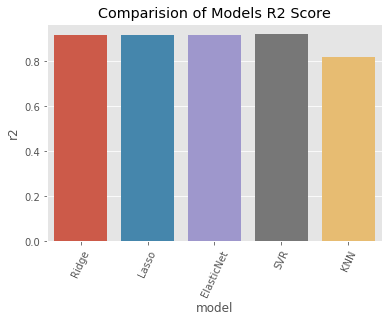

In [32]:
## plt.figure(figsize = (15,8))
ax = sns.barplot(x=df_metric1.index, y="r2", data=df_metric1)
ax.set_title('Comparision of Models R2 Score')
ax.set_xticklabels(ax.get_xticklabels(),rotation=65)
plt.show()

Support Vector Machine seems to perform well in this case. Lets try stacking the models now.